# Assignment 4 - Kanak Agarwal

### Problem 2

In [2]:
import numpy as np

def graph_to_adjacency(V, E):
    # Convert a graph G = (V, E) to its adjacency matrix.
    # V: list of vertices
    # E: list of edges (each edge is a tuple (u, v))
    n = len(V)
    index = {v: i for i, v in enumerate(V)}  # Map vertex to index
    A = np.zeros((n, n), dtype=int)

    for (u, v) in E:
        if u in index and v in index:
            i, j = index[u], index[v]
            A[i][j] = 1
            A[j][i] = 1  # undirected graph
    return A


def adjacency_to_graph(A):
    # Convert an adjacency matrix A to graph G = (V, E)
    n = len(A)
    V = list(range(1, n + 1))
    E = []

    for i in range(n):
        for j in range(i + 1, n):  # only the upper triangle
            if A[i][j] == 1:
                E.append((V[i], V[j]))

    return V, E


def complete_graph(n):
    # Generate a complete graph Kn
    V = list(range(1, n + 1))
    E = [(i, j) for i in V for j in V if i < j]
    return V, E


print("============ Complete Graphs =============")
for n in [4, 5, 6, 10]:
    V, E = complete_graph(n)
    A = graph_to_adjacency(V, E)
    print(f"\nK{n}:")
    print("Adjacency Matrix:\n", A)
    V2, E2 = adjacency_to_graph(A)
    print("Recovered E edges:", len(E2))

# The Heawood graph has 14 vertices and 21 edges.
V_heawood = list(range(14))
E_heawood = [
    (0,1), (0,9), (0,13),
    (1,2), (1,10),
    (2,3), (2,11),
    (3,4), (3,12),
    (4,5), (4,13),
    (5,6), (5,10),
    (6,7), (6,11),
    (7,8), (7,12),
    (8,9), (8,10),
    (9,11),
    (10,12),
    (11,13)
]

A_heawood = graph_to_adjacency(V_heawood, E_heawood)
print("\n========== Heawood Graph ================")
print("Adjacency Matrix (14×14):\n", A_heawood)
print("Number of edges:", len(E_heawood))

V_back, E_back = adjacency_to_graph(A_heawood)
print("Recovered vertices:", len(V_back))
print("Recovered edges:", len(E_back))

============ Complete Graphs =============

K4:
Adjacency Matrix:
 [[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
Recovered E edges: 6

K5:
Adjacency Matrix:
 [[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]
Recovered E edges: 10

K6:
Adjacency Matrix:
 [[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]
Recovered E edges: 15

K10:
Adjacency Matrix:
 [[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]
Recovered E edges: 45

========== Heawood Graph ================
Adjacency Matrix (14×14):
 [[0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 1 

### Problem 3

Loaded graph: n = 4039 m = 88234
Average degree: 43.69101262688784
Sample size: 5000
Stats (mean, median, std): (3.7054, 4.0, 1.1962010781653227)


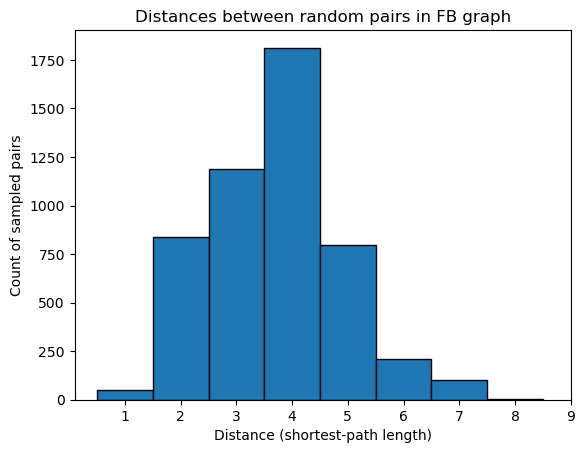

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, median, stdev

def load_snap_facebook(edgefile):
    # Load graph from SNAP facebook_combined.txt
    G = nx.Graph()
    with open(edgefile, 'rt') as f:
        for line in f:
            if line.startswith('#') or line.strip()=='':
                continue
            u, v = line.split()
            u = int(u); v = int(v)
            G.add_edge(u, v)
    return G

def average_degree(G):
    # Compute the average degree of the Graph
    n = G.number_of_nodes()
    m = G.number_of_edges()
    return 2*m / n

def sample_avg_separation(G, num_samples=1000):
    # Pick random node pairs and compute average shortest-path distance
    nodes = list(G.nodes())
    dists = []
    for _ in range(num_samples):
        u, v = random.sample(nodes, 2)
        try:
            d = nx.shortest_path_length(G, u, v)
        except nx.NetworkXNoPath:
            # you may want to skip unreachable pairs or assign inf
            continue
        dists.append(d)
    return dists  # list of path lengths for sampled pairs

def plot_histogram(distances, title="Histogram of shortest-path distances"):
    maxd = max(distances)
    bins = list(range(1, maxd+2))
    plt.hist(distances, bins=bins, align='left', edgecolor='black')
    plt.xlabel("Distance (shortest-path length)")
    plt.ylabel("Count of sampled pairs")
    plt.title(title)
    plt.xticks(bins)
    plt.show()

def stats_distances(distances):
    # Return (mean, median, std_dev)
    return mean(distances), median(distances), stdev(distances)

if __name__ == "__main__":
    edgefile = "facebook_combined.txt"
    G = load_snap_facebook(edgefile)
    print("Loaded graph: n =", G.number_of_nodes(), "m =", G.number_of_edges())
    print("Average degree:", average_degree(G))

    dists = sample_avg_separation(G, num_samples=5000)
    print("Sample size:", len(dists))
    print("Stats (mean, median, std):", stats_distances(dists))
    plot_histogram(dists, title="Distances between random pairs in FB graph")


### Problem 4


Testing n = 100

Testing n = 200

Testing n = 300

Testing n = 400

Testing n = 500

Testing n = 600

Testing n = 700

Testing n = 800

Testing n = 900

Testing n = 1000


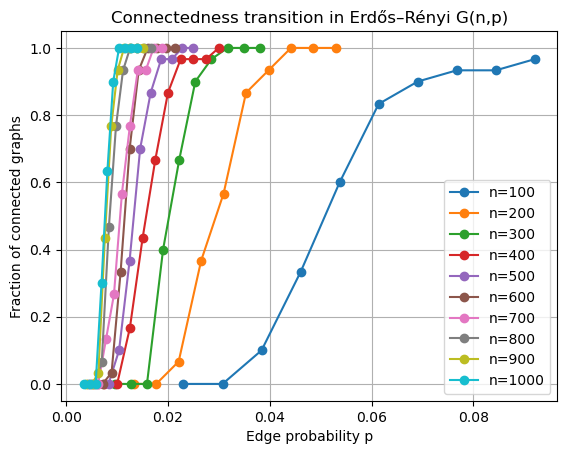

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def is_connected(G):
    # Check if a graph is connected using BFS
    return nx.is_connected(G)

def test_connectedness_erdos_renyi():
    n_values = np.arange(100, 1100, 100)
    num_trials = 30
    results = {}

    for n in n_values:
        logn = np.log(n)
        p_values = np.linspace(0.5 * logn / n, 2 * logn / n, 10)
        connected_frac = []

        for p in p_values:
            count_connected = 0
            for seed in range(num_trials):
                random.seed(seed)
                G = nx.erdos_renyi_graph(n, p, seed=seed)
                if is_connected(G):
                    count_connected += 1
            connected_frac.append(count_connected / num_trials)

        results[n] = (p_values, connected_frac)
        plt.plot(p_values, connected_frac, marker='o', label=f"n={n}")

    plt.xlabel("Edge probability p")
    plt.ylabel("Fraction of connected graphs")
    plt.title("Connectedness transition in Erdős–Rényi G(n,p)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

# Run
results = test_connectedness_erdos_renyi()

p=0.400, percolation prob=0.00
p=0.425, percolation prob=0.00
p=0.450, percolation prob=0.00
p=0.475, percolation prob=0.00
p=0.500, percolation prob=0.00
p=0.525, percolation prob=0.00
p=0.550, percolation prob=0.00
p=0.575, percolation prob=0.23
p=0.600, percolation prob=0.73
p=0.625, percolation prob=0.97
p=0.650, percolation prob=1.00
p=0.675, percolation prob=1.00
p=0.700, percolation prob=1.00


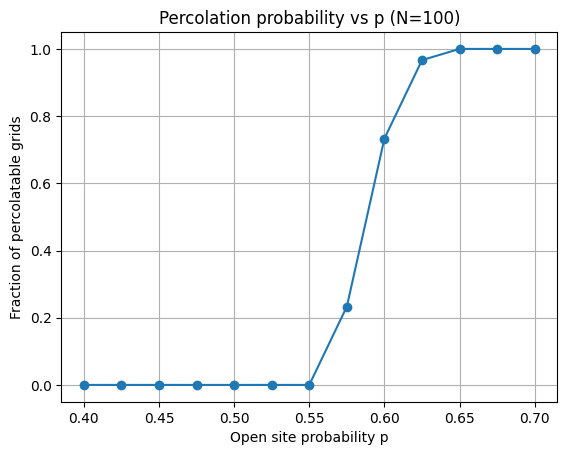

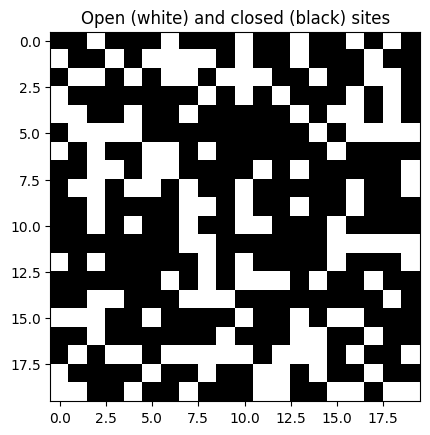

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random

def generate_grid(N, p):
    # Generate NxN grid with open=1, closed=0
    grid = np.random.rand(N, N) < p
    return grid.astype(int)

def plot_grid(grid):
    plt.imshow(grid, cmap='Greys', origin='upper')
    plt.title("Open (white) and closed (black) sites")
    plt.show()

def percolates(grid):
    # Check if there's a path from top to bottom through open sites
    N = len(grid)
    visited = np.zeros_like(grid, dtype=bool)
    q = deque()

    # enqueue all open cells in the top row
    for j in range(N):
        if grid[0, j] == 1:
            q.append((0, j))
            visited[0, j] = True

    dirs = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    while q:
        i, j = q.popleft()
        if i == N - 1:  # reached bottom row
            return True
        for di, dj in dirs:
            ni, nj = i + di, j + dj
            if 0 <= ni < N and 0 <= nj < N:
                if grid[ni, nj] == 1 and not visited[ni, nj]:
                    visited[ni, nj] = True
                    q.append((ni, nj))
    return False

def test_percolation(N=100, p_values=np.linspace(0.4, 0.7, 13), trials=30):
    percolation_prob = []

    for p in p_values:
        count = 0
        for _ in range(trials):
            grid = generate_grid(N, p)
            if percolates(grid):
                count += 1
        percolation_prob.append(count / trials)
        print(f"p={p:.3f}, percolation prob={percolation_prob[-1]:.2f}")

    plt.plot(p_values, percolation_prob, marker='o')
    plt.xlabel("Open site probability p")
    plt.ylabel("Fraction of percolatable grids")
    plt.title(f"Percolation probability vs p (N={N})")
    plt.grid(True)
    plt.show()

    return p_values, percolation_prob

p_values, perc_prob = test_percolation()
plot_grid(generate_grid(20, 0.6))

### Problem 5

In [ ]:
import os
import sys
import pandas as pd
import networkx as nx

EDGE_FILE = "Edges.txt"  # change this path if your file is named differently

def load_edges(edge_file):
    # Try to read; whitespace or comma separated
    try:
        df = pd.read_csv(edge_file, comment='#', header=None, sep=None, engine='python',
                         names=['u', 'v', 'w'])
    except Exception:
        df = pd.read_csv(edge_file, comment='#', header=None, sep=r'\s+', names=['u', 'v', 'w'])

    df = df.dropna()
    df['w'] = pd.to_numeric(df['w'], errors='coerce')
    if df['w'].isnull().any():
        print("Warning: some weights could not be parsed as numeric. They will be set to 0.0")
        df['w'] = df['w'].fillna(0.0)
    return df

def build_graph_from_df(df):
    G = nx.Graph()
    for _, row in df.iterrows():
        u, v, w = row['u'], row['v'], float(row['w'])
        G.add_edge(u, v, weight=w)
    return G

def largest_connected_subgraph(G):
    if nx.is_connected(G):
        return G, None
    comps = list(nx.connected_components(G))
    comps.sort(key=len, reverse=True)
    largest = comps[0]
    Gs = G.subgraph(largest).copy()
    return Gs, comps

def compute_mst(G):
    T = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal')
    total_w = sum(d['weight'] for _, _, d in T.edges(data=True))
    return T, total_w

try:
    edges = load_edges(EDGE_FILE)
    print(f"Loaded edges: {len(edges)} rows. Sample:")
    print(edges.head(5).to_string(index=False))
except FileNotFoundError:
    sys.exit(1)

# Build undirected graph
G = build_graph_from_df(edges)
print(f"\nConstructed undirected graph: n = {G.number_of_nodes()}, m = {G.number_of_edges()}")

# Connectedness check
if nx.is_connected(G):
    print("Graph is connected.")
    Gcc = G
else:
    print("Graph is NOT connected.")
    Gcc, comps = largest_connected_subgraph(G)
    print(f" - Number of connected components: {len(comps)}")
    print(f" - Largest connected component size: {Gcc.number_of_nodes()} nodes, {Gcc.number_of_edges()} edges")

# Minimal spanning tree
T, total_weight = compute_mst(Gcc)
print(f"\nMinimum Spanning Tree:")
print(f" - Nodes: {T.number_of_nodes()}, Edges: {T.number_of_edges()}")
print(f" - Total weight: {total_weight:.6g}")

pd.DataFrame([(u, v, d['weight']) for u, v, d in T.edges(data=True)], columns=['u', 'v', 'weight']).to_csv("MST_edges.csv", index=False)
print("Saved MST edges to 'MST_edges.csv'.")

Loaded edges: 19094 rows. Sample:
   u    v            w
2903 2903 19093.000000
   1    1     0.066908
   2    1    -0.029737
  17    1    -0.029737
 225    1    -0.003717

Constructed undirected graph: n = 2903, m = 10998
Graph is connected.

Minimum Spanning Tree:
 - Nodes: 2903, Edges: 2902
 - Total weight: -232.263
Saved MST edges to 'MST_edges.csv'.


### Problem 6

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

city_name = "Chennai, India"

G = ox.graph_from_place(city_name, network_type='drive')
G_undirected = G.to_undirected()

print(f"Graph loaded: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")


Graph loaded: 68301 nodes, 90794 edges


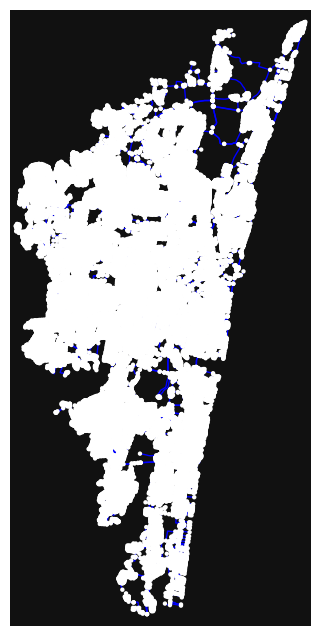

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G_undirected, node_size=10, edge_color='blue')

In [5]:
if nx.is_connected(G_undirected):
    print("Graph is connected.")
else:
    # Get largest connected component
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    G_undirected = G_undirected.subgraph(largest_cc).copy()
    print(f"Largest connected component has {G_undirected.number_of_nodes()} nodes")

Graph is connected.


MST has 68300 edges, total length = 3492451.67 meters


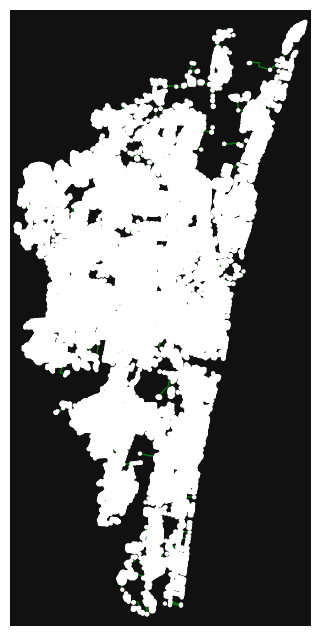

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
T = nx.minimum_spanning_tree(G_undirected, weight='length')
print(f"MST has {T.number_of_edges()} edges, total length = {sum(d['length'] for _,_,d in T.edges(data=True)):.2f} meters")
ox.plot_graph(T, node_size=10, edge_color='green')

In [7]:
# node with highest degree
source = max(dict(G_undirected.degree()).items(), key=lambda x: x[1])[0]

# Shortest paths
lengths = nx.single_source_shortest_path_length(G_undirected, source)
print(f"Computed shortest paths to {len(lengths)} nodes")

for k in list(lengths.keys())[:10]:
    print(f"{source} -> {k}: {lengths[k]} hops")

Computed shortest paths to 68301 nodes
254142574 -> 254142574: 0 hops
254142574 -> 11185535643: 1 hops
254142574 -> 289176728: 1 hops
254142574 -> 6239051390: 1 hops
254142574 -> 254143110: 1 hops
254142574 -> 289176907: 2 hops
254142574 -> 289176908: 2 hops
254142574 -> 289176727: 2 hops
254142574 -> 289176732: 2 hops
254142574 -> 311310222: 2 hops


Average degree: 2.66
Mean: 103.00, Median: 96.00, Std: 47.05


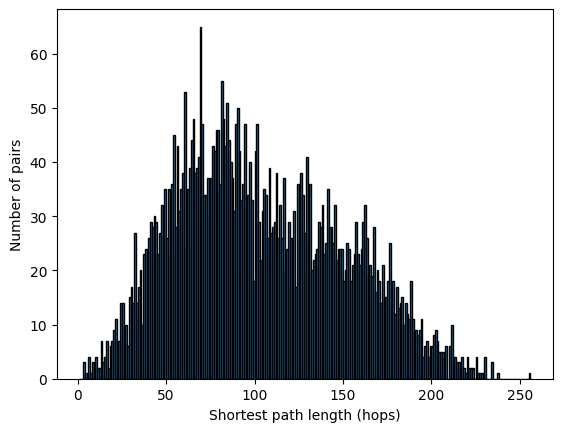

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Degree
degrees = [d for n, d in G_undirected.degree()]
print(f"Average degree: {np.mean(degrees):.2f}")

import random
nodes = list(G_undirected.nodes())
sample_size = 5000
distances = []
for _ in range(sample_size):
    u, v = random.sample(nodes, 2)
    try:
        distances.append(nx.shortest_path_length(G_undirected, u, v))
    except nx.NetworkXNoPath:
        distances.append(np.nan)

distances = [d for d in distances if not np.isnan(d)]
print(f"Mean: {np.mean(distances):.2f}, Median: {np.median(distances):.2f}, Std: {np.std(distances):.2f}")

# Histogram
plt.hist(distances, bins=range(1, max(distances)+2), edgecolor='black')
plt.xlabel("Shortest path length (hops)")
plt.ylabel("Number of pairs")
plt.show()